In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal
import cartopy
import geoplot
import osmnx
import folium
import dash
import rasterio as rio
import osmnx
import contextily as ctx
import rasterstats 
from rasterio.plot import show
import os
from shapely.geometry import Polygon, mapping
from rasterio.mask import mask
import seaborn as sns

C:\Users\Yohan_Min\Anaconda3\envs\route_dynamics\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


## Reading Shape.file

In [2]:
fp = 'Transit_Routes_for_King_County_Metro__transitroute_line.shp'
data = gpd.read_file(fp)
data.crs

{'init': 'epsg:4326'}

In [299]:
data

,OBJECTID,CHANGE_NUM,MINOR_CHAN,CURRENT_NE,IN_SERVICE,ROUTE_ID,LOCAL_EXPR,ROUTE_NUM,SHAPE_Leng,geometry
0,1,140,9,IN SERVICE,Y,100001,L,1,41865.741523,(LINESTRING (-122.3177497499018 47.59919807859...
1,2,140,9,IN SERVICE,Y,100002,L,10,28586.528817,(LINESTRING (-122.3377930449671 47.60974983276...
2,3,140,9,IN SERVICE,Y,100005,L,106,100783.176936,(LINESTRING (-122.217189050582 47.481347612252...
3,4,140,9,IN SERVICE,Y,100003,L,101,133635.072181,(LINESTRING (-122.2124335193708 47.47168644391...
4,5,140,9,IN SERVICE,Y,100004,L,105,36236.825215,(LINESTRING (-122.2029776399569 47.48214733583...
5,6,140,9,IN SERVICE,Y,100006,L,107,112229.052148,(LINESTRING (-122.2091527398079 47.47970911502...
6,7,140,9,IN SERVICE,Y,100011,L,111,240901.984217,"(LINESTRING (-122.1151955730682 47.4735675319,..."
7,8,140,9,IN SERVICE,Y,100012,L,113,90274.859365,(LINESTRING (-122.3657841475034 47.50099626558...
8,9,140,9,IN SERVICE,Y,100013,L,114,164257.730278,(LINESTRING (-122.1641617477209 47.48133955893...
9,10,140,9,IN SERVICE,Y,100014,E,116,80701.226507,(LINESTRING (-122.3902134566079 47.52080157126...


In [41]:
dat = data[data['IN_SERVICE']=='Y']
da = dat[data['ROUTE_NUM'] == 45]

da.to_file("da.shp")
print(da.geometry.centroid)

points = folium.GeoJson(da.to_json())
folium.Map(location = [47.6, -122.3], zoom_start = 12).add_child(points)

140    POINT (-122.3397665647399 47.67893312749229)
dtype: object


C:\Users\Yohan_Min\Anaconda3\envs\route_dynamics\lib\site-packages\geopandas\geodataframe.py:455: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Yohan_Min\Anaconda3\envs\route_dynamics\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning:

Use fiona.Env() instead.



## CRS conversion to epsg 4326

In [108]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

crs_proj4 = rio.crs.CRS.from_string('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs' )
dst_crs = crs_proj4  # CRS for web meractor 

with rio.open('king_county_2016_dtm_66.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open('king_county_2016_dtm_66_re.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rio.band(src, i),
                destination=rio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

CPLE_NotSupportedError: No translation for Lambert_Conformal_Conic to PROJ.4 format is known.

In [122]:
with rio.open('kc_66_proj3.tif') as src:
   print(src.crs)

+init=epsg:4326


In [5]:
lidar_dem = rio.open('seattle_dtm.tif')

In [ ]:
lidar_dem = rio.open('seattle_dtm.tif')
lidar_dem.bounds
fig, ax = plt.subplots()
show(lidar_dem, 
     title="Lidar Digital Elevation", 
     ax=ax)
ax.set_axis_off()

In [111]:
def reproject_et(inpath, outpath, new_crs):
    dst_crs = new_crs # CRS for web meractor 

    with rio.open(inpath) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(outpath, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

In [112]:
reproject_et(inpath = 'king_county_2016_dtm_66.tif', outpath = 'king_county_2016_dtm_66_re.tif', new_crs = 'EPSG:4326')

CPLE_NotSupportedError: No translation for Lambert_Conformal_Conic to PROJ.4 format is known.

## Masking

In [124]:
import fiona
import rasterio.mask

with fiona.open("da.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]


In [125]:
with rio.open("kc_66_proj3.tif") as src:
    out_image, out_transform = rio.mask.mask(src, features, crop=True)
    out_meta = src.meta.copy()

In [126]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
with rasterio.open("kc_66_proj3_re.tif", "w", **out_meta) as dest:
    dest.write(out_image)

# Raster value extraction 

In [42]:
rasterstats.point_query('da.shp', 'seattle_dtm.tif')
rasterstats.zonal_stats('da.shp', 'seattle_dtm.tif')

[{'min': 57.91107940673828,
  'max': 339.5931396484375,
  'mean': 223.45934477678858,
  'count': 15613}]

In [8]:
gen = rasterstats.gen_point_query('da.shp', 'seattle_dtm.tif')

for val in gen:
    print(val)

[71.50438155811536, 70.84956025139338, 71.0549230693246, 72.7573766315009, 72.79239894049272, 71.96068746765657, 67.8641705229782, 64.67068298036773, 61.97193967483293, 60.884547171239, 60.66016160153536, 60.93883514759359, 62.47765116409071, 65.67125830381703, 67.13208902807743, 66.97818919759851, 65.97063586220963, 65.15186949443715, 64.7752329950359, 66.48593925923193, 67.08055109423049, 67.33962205237553, 68.27172804992924, 69.25659614076187, 69.98392921895508, 71.04557936658553, 72.11450530571047, 72.20597001291465, 72.827142496399, 72.43156839739854, 72.58472083826443, 73.1114552567459, 72.1194722636482, 71.77013198017441, 71.31112166993182, 71.50438155811536, 71.50438155811536, 70.09935013591485, 69.71694562775026, 65.9713690654532, 59.909046741762296, 59.909046741762296, 64.37390020543322, 67.79515610194188, 67.79515610194188, 64.29251987664118, 59.909046741762296, 67.79515610194188, 70.63015674662083, 70.63015674662083, 70.31492131456783, 69.47812773766788, 69.47812773766788, 

In [9]:
route1 = pd.DataFrame(rasterstats.gen_point_query('da.shp', 'seattle_dtm.tif'))
route11 = [x for x in route1.iloc[0,:] if x is not None]
print(len(route11))
route11

[71.50438155811536,
 70.84956025139338,
 71.0549230693246,
 72.7573766315009,
 72.79239894049272,
 71.96068746765657,
 67.8641705229782,
 64.67068298036773,
 61.97193967483293,
 60.884547171239,
 60.66016160153536,
 60.93883514759359,
 62.47765116409071,
 65.67125830381703,
 67.13208902807743,
 66.97818919759851,
 65.97063586220963,
 65.15186949443715,
 64.7752329950359,
 66.48593925923193,
 67.08055109423049,
 67.33962205237553,
 68.27172804992924,
 69.25659614076187,
 69.98392921895508,
 71.04557936658553,
 72.11450530571047,
 72.20597001291465,
 72.827142496399,
 72.43156839739854,
 72.58472083826443,
 73.1114552567459,
 72.1194722636482,
 71.77013198017441,
 71.31112166993182,
 71.50438155811536,
 71.50438155811536,
 70.09935013591485,
 69.71694562775026,
 65.9713690654532,
 59.909046741762296,
 59.909046741762296,
 64.37390020543322,
 67.79515610194188,
 67.79515610194188,
 64.29251987664118,
 59.909046741762296,
 67.79515610194188,
 70.63015674662083,
 70.63015674662083,
 70.3149

# Extracting points from linestring

In [57]:
shapefile = gpd.read_file("da.shp")
# extract the geometry in GeoJSON format
geoms = shapefile.geometry.values # list of shapely geometries
geometry = geoms[0] # shapely geometry
# transform to GeJSON format
from shapely.geometry import mapping
geoms = [mapping(geoms[0])]
geoms[0]['coordinates']

(((-122.30756053529534, 47.65053260749295),
  (-122.30747273189975, 47.6505702130828),
  (-122.30722583308294, 47.65059260283979),
  (-122.3068467314136, 47.65056076560248),
  (-122.30683129285894, 47.650560143135365),
  (-122.30658756486848, 47.65055123204429),
  (-122.30632510506987, 47.65055435289991),
  (-122.30610376304159, 47.65056215096528),
  (-122.30583183741717, 47.65058924871735),
  (-122.3056157336896, 47.65062439882471),
  (-122.3054930531022, 47.65064846859098),
  (-122.30535077679728, 47.65068266374587),
  (-122.30510921961915, 47.65075049693666),
  (-122.30485900737327, 47.65084229615551),
  (-122.30463960044038, 47.65093287547253),
  (-122.30459347069315, 47.65095184220721),
  (-122.30435237281557, 47.65102158757643),
  (-122.3041100788864, 47.65104912063478),
  (-122.3039019602615, 47.65103672749582),
  (-122.30410672157392, 47.65065788282954),
  (-122.30418118912512, 47.65052174076898),
  (-122.30421089666747, 47.6504673396518),
  (-122.30429884402025, 47.65027700688

In [16]:
print(len(geoms[0]['coordinates']))
print(len(geoms[0]['coordinates'][2]))
li = []
for i in range(len(geoms[0]['coordinates'])):
    li.append(len(geoms[0]['coordinates'][i]))
    
print(np.array(li))
sum(np.array(li))

135
3
[36  5  3  3  2  3  2  8  3  3  3  2  2  3  3  3  2  2  3  3  3  3  3  2
  2  2  3  3  2  3  3  2  3  3  4  3  4  3 24 14  3  2  4  2  3  2  3  2
  2  3  7  9  7  3  3  6  2  3  3  2 13  3  3  6  3  3  5  3  4  3  2  2
  3  2  7  3  2  5  3  2  2  2  3  2  3  3  2  3  2  3  3  2  2  3  3  3
  2  2  3  3  2  3  2  3  2  3  2  2  3  2  2  3  3  2  4  3  2  4  2  3
  6  3  2  4  3  2  2  3  5  2  3  4  3  9  3]


488

In [17]:
print(range(li[0]))
len(li)

range(0, 36)


135

In [45]:
lis = []
for j in range(len(li)):
    for i in range(li[j]):
        lis.append([geoms[0]['coordinates'][j][i][1], geoms[0]['coordinates'][j][i][0]])
        
lis

[[47.65053260749295, -122.30756053529534],
 [47.6505702130828, -122.30747273189975],
 [47.65059260283979, -122.30722583308294],
 [47.65056076560248, -122.3068467314136],
 [47.650560143135365, -122.30683129285894],
 [47.65055123204429, -122.30658756486848],
 [47.65055435289991, -122.30632510506987],
 [47.65056215096528, -122.30610376304159],
 [47.65058924871735, -122.30583183741717],
 [47.65062439882471, -122.3056157336896],
 [47.65064846859098, -122.3054930531022],
 [47.65068266374587, -122.30535077679728],
 [47.65075049693666, -122.30510921961915],
 [47.65084229615551, -122.30485900737327],
 [47.65093287547253, -122.30463960044038],
 [47.65095184220721, -122.30459347069315],
 [47.65102158757643, -122.30435237281557],
 [47.65104912063478, -122.3041100788864],
 [47.65103672749582, -122.3039019602615],
 [47.65065788282954, -122.30410672157392],
 [47.65052174076898, -122.30418118912512],
 [47.6504673396518, -122.30421089666747],
 [47.65027700688739, -122.30429884402025],
 [47.650070332074

In [46]:
print(len(lis))
lis[0]
geodesic(lis[36],lis[37]).m

488


60.56644866870405

# Distance measure

In [47]:
from geopy.distance import geodesic
geodesic(( 47.65086210845893,-122.30820251335712),( 47.65102755761703,-122.30857526433199)).m
range(len(lis))

lis[0]
geodesic(lis[0],lis[1]).m
len(lis)-1

487

In [50]:
dis = []
for i in range(len(lis)-1):
    dis.append(geodesic(lis[i],lis[i+1]).m)
               
len(dis)
len(np.insert(dis, 0, 0))
distnt = np.insert(dis, 0, 0)
tem_distnt = np.cumsum(distnt)
len(tem_distnt)

488

In [51]:
tem_distnt

array([0.00000000e+00, 7.80995588e+00, 2.65252371e+01, 5.52254699e+01,
       5.63873991e+01, 7.47249587e+01, 9.44460690e+01, 1.11097620e+02,
       1.31747781e+02, 1.48446935e+02, 1.58044320e+02, 1.69389244e+02,
       1.89041655e+02, 2.10431666e+02, 2.29748205e+02, 2.33804979e+02,
       2.53508145e+02, 2.71966627e+02, 2.87662598e+02, 3.32505052e+02,
       3.48642608e+02, 3.55089754e+02, 3.77259132e+02, 4.00999017e+02,
       4.24588700e+02, 4.49874814e+02, 4.78963429e+02, 4.89537126e+02,
       4.96531627e+02, 5.02357532e+02, 5.08685908e+02, 5.19787135e+02,
       5.95984131e+02, 6.07622006e+02, 6.76851181e+02, 7.55162027e+02,
       7.55162027e+02, 8.15728476e+02, 8.49233649e+02, 9.09798753e+02,
       1.04981521e+03, 1.04981521e+03, 1.08854562e+03, 1.12316688e+03,
       1.12316688e+03, 1.15748344e+03, 1.19651856e+03, 1.26987023e+03,
       1.36020886e+03, 1.36020886e+03, 1.42335829e+03, 1.43320867e+03,
       1.43320867e+03, 1.50620848e+03, 1.57920828e+03, 1.58918164e+03,
      

# Profile plot

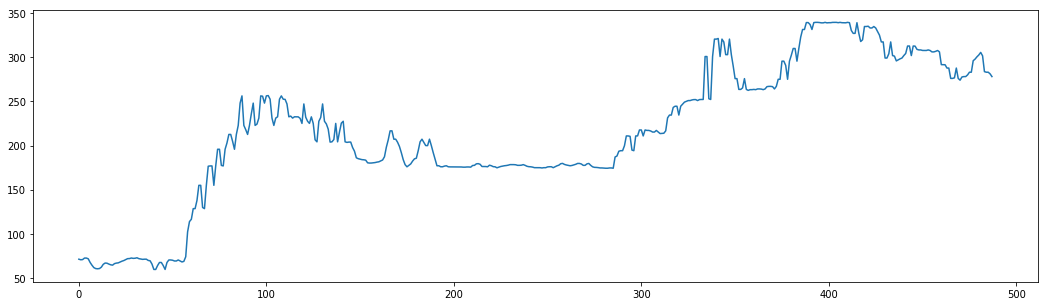

In [56]:
plt.figure(figsize=(18,5))
plt.plot(route1.T)

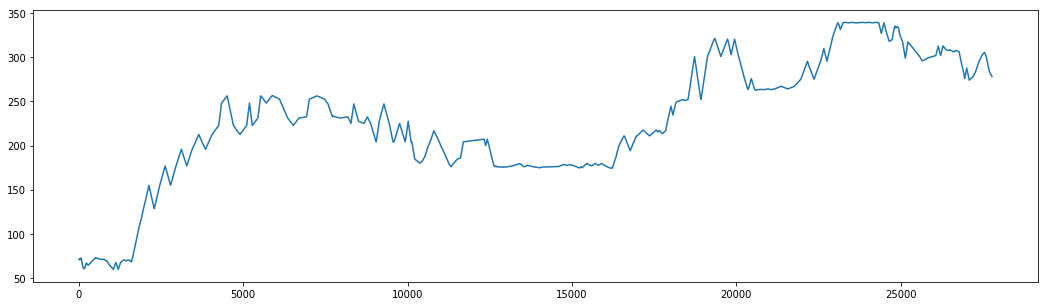

In [52]:
plt.figure(figsize=(18,5))
tem = pd.DataFrame({'elev': route11, 'dist':tem_distnt})
plt.plot(tem['dist'], tem['elev'])

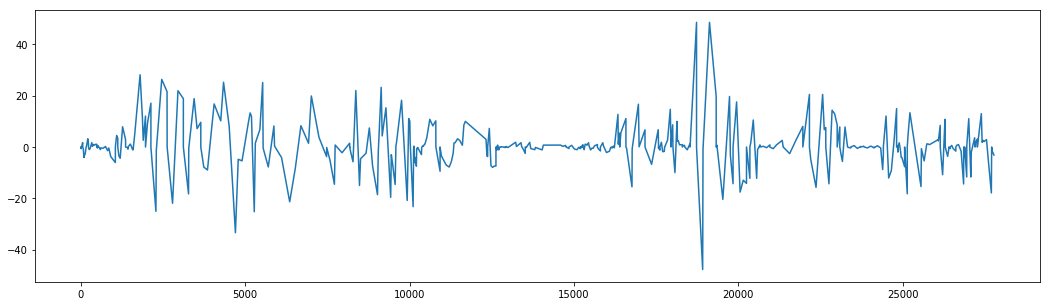

In [53]:
plt.figure(figsize=(18,5))
plt.plot(tem['dist'], np.insert(np.diff(route11), 0,0))

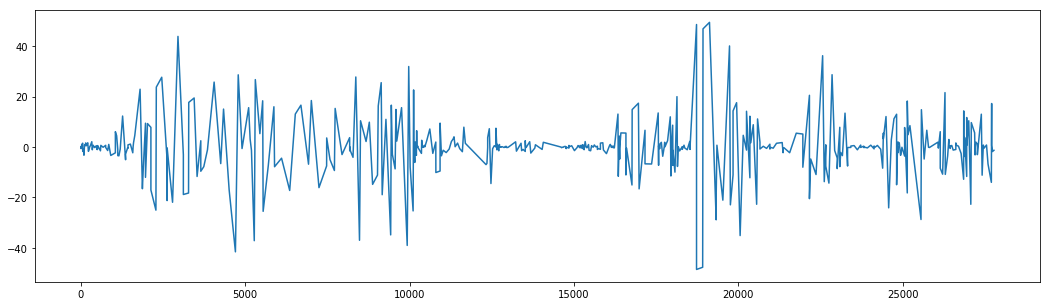

In [54]:
plt.figure(figsize=(18,5))
plt.plot(tem['dist'], np.insert(np.diff(np.insert(np.diff(route11), 0,0)),0,0))

# Shape file exploration

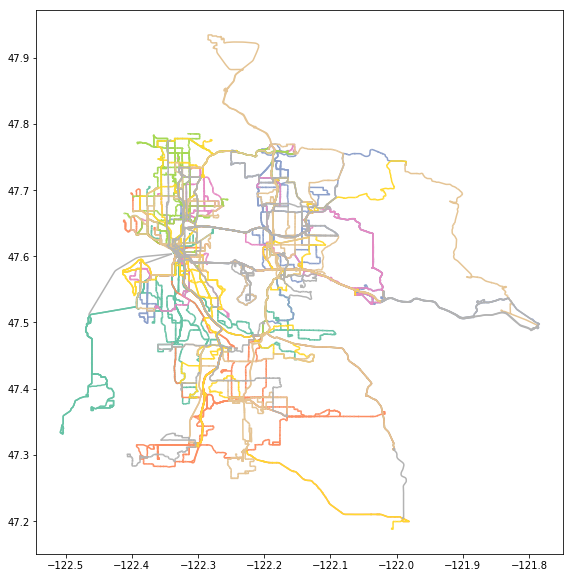

In [34]:
dat.plot(cmap='Set2', figsize=(10, 10))

In [6]:
dat.geom_type.head()

0    MultiLineString
1    MultiLineString
2    MultiLineString
3    MultiLineString
4    MultiLineString
dtype: object

In [7]:
dat.geometry.bounds.head()

,minx,miny,maxx,maxy
0,-122.370416,47.599189,-122.317750,47.645857
1,-122.339813,47.599196,-122.311901,47.634133
2,-122.328035,47.479702,-122.207855,47.599210
3,-122.338489,47.471297,-122.202988,47.614514
4,-122.208025,47.479663,-122.164171,47.507331


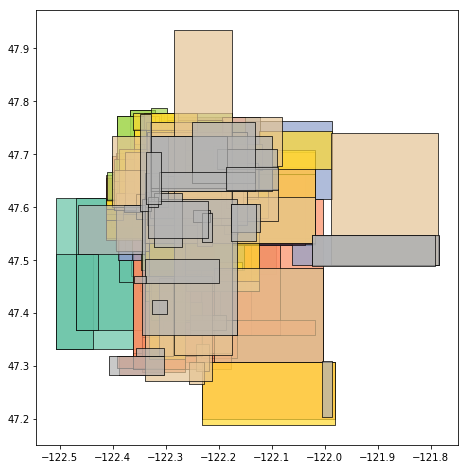

In [8]:
dat.envelope.plot(cmap='Set2', figsize=(8, 8), alpha=0.7, edgecolor='black')

C:\Users\Yohan_Min\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



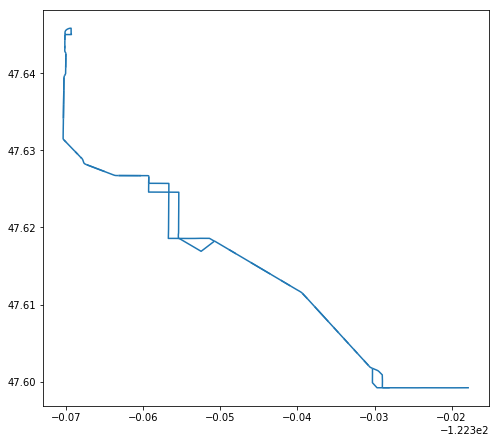

In [9]:
dat[data['ROUTE_ID'] == 100001].plot(figsize=(8, 8))

In [10]:
grid_fp = "data.shp"
grid = gpd.read_file(grid_fp)

print(grid.crs)
print(grid.head(2))

{'init': 'epsg:4326'}
    2010_Censu    2010_Cen_1    2010_Cen_2    2010_Cen_3    2010_Cen_4  \
0  53033000100  3.440312e+07  23925.247095  19731.620749  1.990361e+07   
1  53033000200  3.537106e+07  24111.645835  24111.645835  3.537106e+07   

    county_sim  county_s_1 county_s_2  county_s_3  county_s_4  county_s_5  \
0  53033000100    0.070703      44951      0.5406      6918.0    0.855726   
1  53033000200    0.041828      56208      0.4115      7974.0    0.726076   

   county_s_6  county_s_7  county_s_8  \
0    0.065915           1    1.910584   
1    0.030297           0    3.286321   

                                            geometry  
0  POLYGON ((-122.2841872052759 47.73360555058854...  
1  POLYGON ((-122.3019538169408 47.73382983145742...  


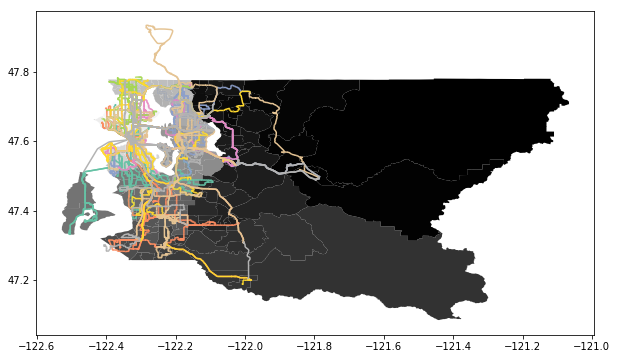

In [11]:
ax = grid.plot(cmap='Greys', figsize=(10, 10))
dat.plot(ax=ax, cmap='Set2')

## Reading raster.file

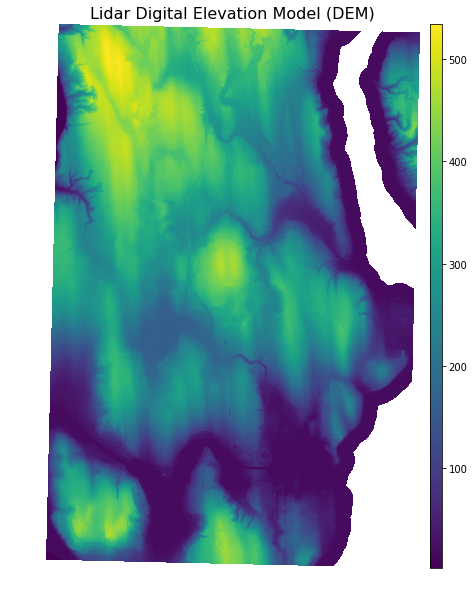

In [43]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

lidar_dem = rio.open('king_county_2016_dtm_66.tif')
lidar_dem_im = lidar_dem.read(masked=True)
bounds = lidar_dem.bounds

# Reshape the bounds into a form that matplotlib wants
bounds = [bounds.left, bounds.right, bounds.bottom, bounds.top]

fig, ax = plt.subplots(figsize=(10, 10))
fin_plot = ax.imshow(lidar_dem_im[0], cmap='viridis')
ax.set_axis_off()

# scale color bar to the height of the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.15)
fig.colorbar(fin_plot, cax = cax)
ax.set_title("Lidar Digital Elevation Model (DEM)", 
             fontsize = 16);

In [157]:
lidar = 'kc_66_proj3.tif'
pt = rio.open(lidar)
print(pt.meta)
print(pt.res)
print(pt.crs)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 13039, 'height': 12582, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(1.0250844476092024e-05, 0.0, -122.38072637080977,
       0.0, -1.0250844476092267e-05, 47.75180934575821)}
(1.0250844476092024e-05, 1.0250844476092267e-05)
+init=epsg:4326


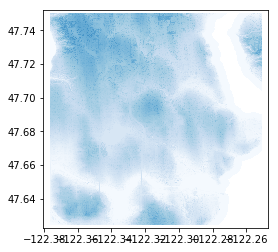

In [158]:
rioplot.show(pt, with_bounds=True, cmap=plt.cm.Blues)


* **TIF** (Tagged Image File Format) is very common in scientific imaging. It is lossless (meaning that you don't lose any information during the compression process). The downside is they are extremely large. They also have compatibility issues when using in HTML.

* **GIF** (Graphics Interchange Format): very small, which is useful for animated images on the internet. Perhaps not the most useful for scientific purposes, because they are extremely lossy.

* **PNG** (Portable Network Graphics): some data compression like GIFS, but no loss of information. Probably a good option for some scientific applications.

* **JPEG** (Joint Photographic Experts Group) renders high quality image, has more compression than PNG, but some loss of information.

In [49]:
import skimage
import skimage.io as sio
import skimage.util as skt
import os

In [16]:
print("The file '.tif' is {} KB".format(np.round(os.stat('king_county_2016_dtm_66.tif').st_size/1000, 2)))

The file '.tif' is 755114.21 KB


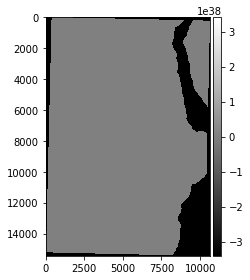

In [17]:
sio.imshow(sio.imread('king_county_2016_dtm_66.tif'), cmap='gray')

In [18]:
array = pt.read(1)
array.shape

(15443, 10622)

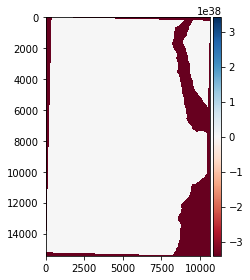

In [19]:
sio.imshow(array)

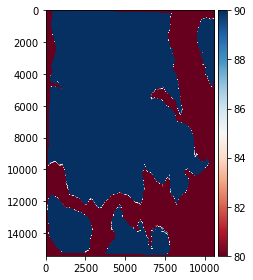

In [20]:
sio.imshow(array, vmin=80, vmax=90)

# Earth Lab

In [16]:
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os
plt.ion()

from shapely.geometry import Polygon, mapping
from rasterio.mask import mask

# Set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (8, 8)

# Prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("white")

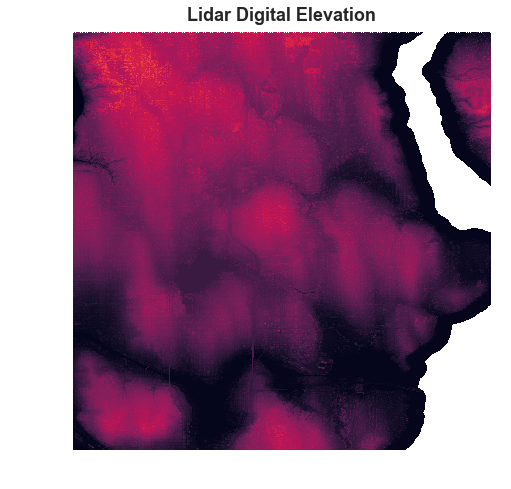

In [18]:
lidar_dem = rio.open('kc_66_proj3.tif')
lidar_dem.bounds
fig, ax = plt.subplots()
show(lidar_dem, 
     title="Lidar Digital Elevation", 
     ax=ax)
ax.set_axis_off()

In [19]:
lidar_dem.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028230607370965e+38,
 'width': 13039,
 'height': 12582,
 'count': 1,
 'crs': CRS({'init': 'epsg:4326'}),
 'transform': Affine(1.0250844476092024e-05, 0.0, -122.38072637080977,
        0.0, -1.0250844476092267e-05, 47.75180934575821)}

In [20]:
lidar_dem

<open DatasetReader name='kc_66_proj3.tif' mode='r'>

In [82]:
with rio.open('king_county_2016_dtm_66_re.tif') as src:
   print(src.crs)

+init=epsg:4326


In [7]:
with rio.open('king_county_2016_dtm_66.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im = src.read()
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    bounds = src.bounds
    
# This is the format that matplotlib wants
print("spatial extent:", spatial_extent)
# This is the format that rasterio provides with the bounds attribute
print("rasterio bounds:", bounds)

spatial extent: (1177721.0, 1209587.0, 840469.0, 886798.0)
rasterio bounds: BoundingBox(left=1177721.0, bottom=840469.0, right=1209587.0, top=886798.0)


In [8]:
with rio.open('king_county_2016_dtm_66.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    lidar_dem_im = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

print("object shape:", lidar_dem_im.shape)
print("object type:", type(lidar_dem_im))

object shape: (15443, 10622)
object type: <class 'numpy.ma.core.MaskedArray'>


In [25]:
with rio.open('king_county_2016_dtm_66.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im2 = src.read(1)

with rio.open('king_county_2016_dtm_66.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im3 = src.read()
    
print("Array Shape Using read(1):", lidar_dem_im2.shape)   
# Notice that without the (1), your numpy array has a third dimension
print("Array Shape Using read():", lidar_dem_im3.shape)    

Array Shape Using read(1): (15443, 10622)
Array Shape Using read(): (1, 15443, 10622)


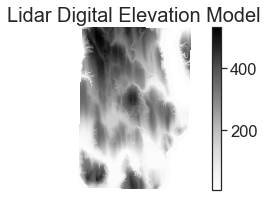

In [26]:
fig, ax = plt.subplots(figsize = (8,3))
lidar_plot = ax.imshow(lidar_dem_im, 
                       cmap='Greys', 
                       extent=spatial_extent)
ax.set_title("Lidar Digital Elevation Model", fontsize= 20)
fig.colorbar(lidar_plot)
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

In [27]:
lidar_dem_im

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-3.402823e+38,
  dtype=float32)

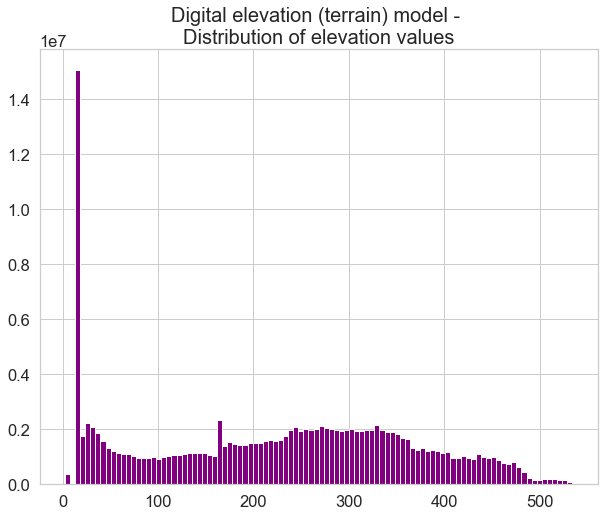

In [9]:
sns.set_style("whitegrid")
# Plot histogram
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(lidar_dem_im.ravel(),
        bins=100, 
        color='purple')
ax.set_title("Digital elevation (terrain) model - \nDistribution of elevation values", 
             fontsize=20);

In [31]:
with rio.open('king_county_2016_dtm_66.tif') as src:
    print(src.crs)

+ellps=GRS80 +lat_0=45.33333333333334 +lat_1=45.83333333333334 +lat_2=47.33333333333334 +lon_0=-120.5 +no_defs +proj=lcc +units=us-ft +x_0=500000.0000000002 +y_0=0


In [11]:
print(src.bounds)
print(src.res)
print(lidar_dem_im.shape)
print(lidar_dem_im.ravel().shape)

BoundingBox(left=1177721.0, bottom=840469.0, right=1209587.0, top=886798.0)
(3.0, 3.0)
(15443, 10622)
(164035546,)


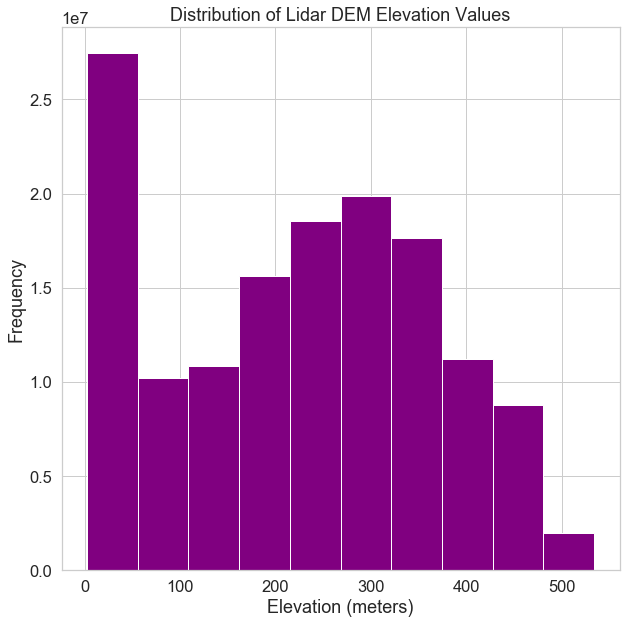

In [12]:
lidar_dem_hist = lidar_dem_im.ravel()
lidar_dem_hist = lidar_dem_hist[~np.isnan(lidar_dem_hist)]

fig, ax = plt.subplots(figsize=(10,10))
ax.hist(lidar_dem_hist, color='purple')
ax.set(xlabel = 'Elevation (meters)', 
       ylabel = 'Frequency',
       title = "Distribution of Lidar DEM Elevation Values");

In [13]:
lidar_dem.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028230607370965e+38,
 'width': 10622,
 'height': 15443,
 'count': 1,
 'crs': CRS({'proj': 'lcc', 'lat_1': 45.83333333333334, 'lat_2': 47.33333333333334, 'lat_0': 45.33333333333334, 'lon_0': -120.5, 'x_0': 500000.0000000002, 'y_0': 0, 'ellps': 'GRS80', 'units': 'us-ft', 'no_defs': True}),
 'transform': Affine(3.0, 0.0, 1177721.0,
        0.0, -3.0, 886798.0)}

In [37]:
with rio.open('king_county_2016_dtm_66.tif') as lidar_dem:
    print(lidar_dem.tags(ns='IMAGE_STRUCTURE'))
    lidar_dem_mask = lidar_dem.dataset_mask()

{'COMPRESSION': 'LZW', 'INTERLEAVE': 'BAND'}


In [38]:
lidar_dem_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
lidar_dem.crs.data

{'proj': 'lcc',
 'lat_1': 45.83333333333334,
 'lat_2': 47.33333333333334,
 'lat_0': 45.33333333333334,
 'lon_0': -120.5,
 'x_0': 500000.0000000002,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'us-ft',
 'no_defs': True}

In [16]:
import rasterio as rio
from rasterio.plot import plotting_extent
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.ion()
# Set plot parameters
plt.rcParams['figure.figsize'] = (8, 8)
# Prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [17]:
dtm_path = 'king_county_2016_dtm_66.tif'
with rio.open(dtm_path) as src:
    lidar_dtm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

print('min value:' ,lidar_dtm_im.min())
print('max value:' ,lidar_dtm_im.max())

min value: 2.3584232
max value: 534.2357


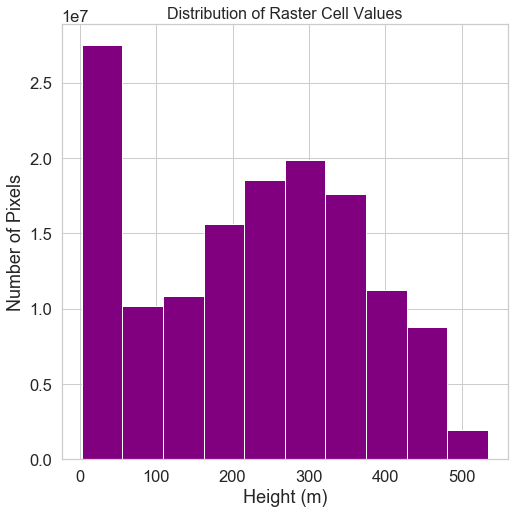

In [18]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(lidar_dtm_im.ravel(), 
        color='purple', 
        edgecolor='white')
ax.set_title("Distribution of Raster Cell Values",
             fontsize = 16)
ax.set(xlabel="Height (m)", 
       ylabel="Number of Pixels");

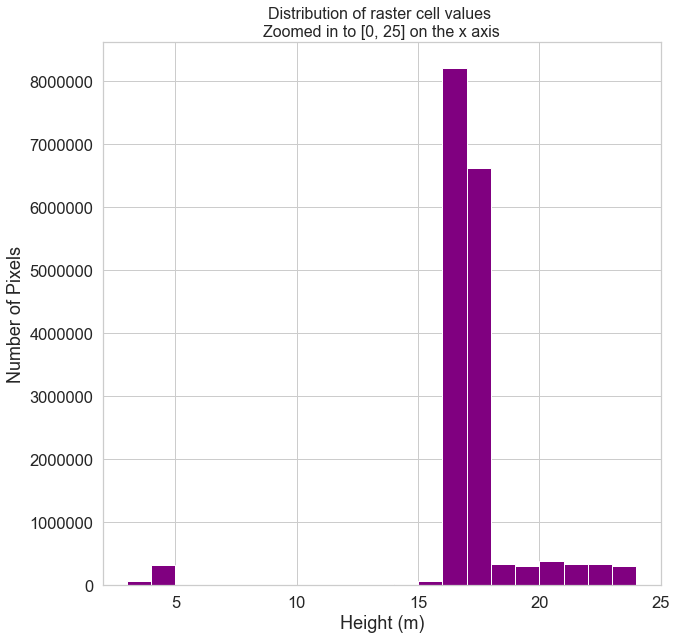

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
xlim = [0, 25]
ax.hist(lidar_dtm_im.ravel(), 
        color='purple', edgecolor='white', range=xlim,
        bins=range(*xlim))
ax.set(ylabel="Number of Pixels", xlabel="Height (m)",
       xlim=[2, 25]);
ax.set_title("Distribution of raster cell values \nZoomed in to {} on the x axis".format(xlim),
             fontsize=16);

In [20]:
counts, bins, patches = ax.hist(lidar_dtm_im.ravel(), 
                                color='springgreen', 
                                bins=50, range=xlim)
# Print histogram outputs
print("counts:", counts)
print("bins:", bins)

counts: [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 6.000000e+00
 7.000000e+00 1.280000e+02 6.629200e+04 3.014660e+05 1.526200e+04
 2.645000e+03 2.071000e+03 1.597000e+03 1.269000e+03 1.108000e+03
 9.280000e+02 8.210000e+02 7.020000e+02 6.500000e+02 6.060000e+02
 6.290000e+02 6.830000e+02 7.560000e+02 9.850000e+02 8.280000e+02
 1.073000e+03 2.610000e+03 5.157000e+03 7.302000e+03 1.968000e+04
 2.169500e+04 4.318900e+04 5.493300e+04 8.150591e+06 6.362473e+06
 2.521810e+05 1.865070e+05 1.552560e+05 1.450780e+05 1.660430e+05
 1.922910e+05 1.860710e+05 1.779110e+05 1.672690e+05 1.710020e+05
 1.595930e+05 1.451600e+05 1.539880e+05 1.589970e+05 1.687330e+05]
bins: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25. ]


In [21]:
lidar_dtm_im.fill_value

-3.402823e+38

In [22]:
class_bins = [lidar_dtm_im.min(), 100, 300, 500, np.inf]

# You'll classify the original image array, then unravel it again for plotting
lidar_dtm_im_class = np.digitize(lidar_dtm_im, class_bins)

# Note that you have an extra class in the data (0)
print(np.unique(lidar_dtm_im_class))

[0 1 2 3 4]


In [23]:
lidar_dtm_class_ma = np.ma.masked_where(lidar_dtm_im_class == 0 , 
                              lidar_dtm_im_class, 
                              copy=True)
lidar_dtm_class_ma

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=999999,
  dtype=int64)

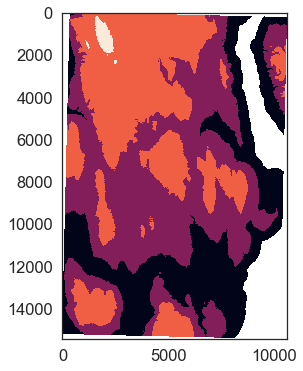

In [24]:
sns.set_style("white")
# Plot newly classified and masked raster
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(lidar_dtm_class_ma)
plt.show()

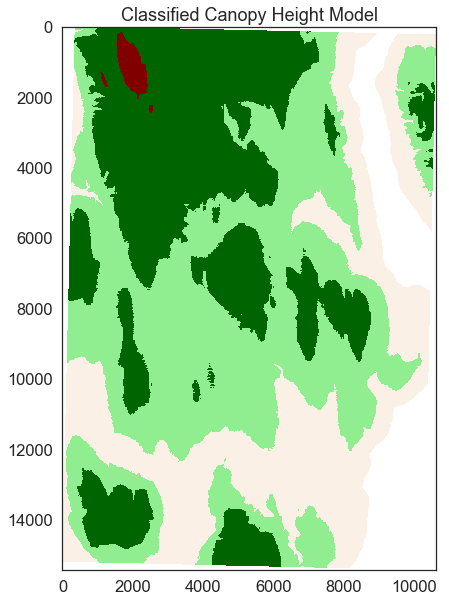

In [26]:
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']

cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(lidar_dtm_class_ma, 
          cmap=cmap)
ax.set_title("Classified Canopy Height Model");